# Preprocess data

## Import data

In [2]:
import os
import pandas as pd

prefix_path = "./data/"

full_raw_path = prefix_path + "Train_data.csv"

cls_1_raw_path = prefix_path + "cls_1_raw.csv"
cls_2_raw_path = prefix_path + "cls_2_raw.csv"
cls_3_raw_path = prefix_path + "cls_3_raw.csv"
cls_4_raw_path = prefix_path + "cls_4_raw.csv"
cls_5_raw_path = prefix_path + "cls_5_raw.csv"
cls_raw_paths = [cls_1_raw_path,
                 cls_2_raw_path,
                 cls_3_raw_path,
                 cls_4_raw_path,
                 cls_5_raw_path]


# Check to see data has been extracted before
if all( [ os.path.exists(csv_filepath) for csv_filepath in cls_raw_paths ] ):
    
    # Load data
    cls_1_raw = pd.read_csv(cls_1_raw_path)
    cls_2_raw = pd.read_csv(cls_2_raw_path)
    cls_3_raw = pd.read_csv(cls_3_raw_path)
    cls_4_raw = pd.read_csv(cls_4_raw_path)
    cls_5_raw = pd.read_csv(cls_5_raw_path)

else:

    # Extract data into different classes
    full_df = pd.read_csv(full_raw_path, index_col=0)
    
    # Check if folder exists
    if not os.path.exists(prefix_path):
        os.mkdir(prefix_path)

    cls_1_raw = full_df[full_df['y'] == 1]
    cls_2_raw = full_df[full_df['y'] == 2]
    cls_3_raw = full_df[full_df['y'] == 3]
    cls_4_raw = full_df[full_df['y'] == 4]
    cls_5_raw = full_df[full_df['y'] == 5]

    # Write data into CSV files

    cls_1_raw.to_csv(cls_1_raw_path)
    cls_2_raw.to_csv(cls_2_raw_path)
    cls_3_raw.to_csv(cls_3_raw_path)
    cls_4_raw.to_csv(cls_4_raw_path)
    cls_5_raw.to_csv(cls_5_raw_path)

## Extract validation data
Further split data into validation and training+testing sets, if doesn't exist already.

In [3]:
from sklearn.model_selection import train_test_split
from datetime import datetime
import glob

train_test_paths = glob.glob( os.path.join(prefix_path, '*train_test_data.csv') )
validation_paths = glob.glob( os.path.join(prefix_path, '*_validation_data.csv') )

# Check for multiple datasets
if len(train_test_paths) == len(validation_paths) and len(train_test_paths) != 1:

    len_prefix = len(prefix_path)

    # Sort the dates starting from latest (based on train_test_paths)
    sorted_dates = sorted( [ os.path.splitext(path)[0][len_prefix:len_prefix+11] for path in train_test_paths ], reverse=True )

    # Iterate through all the dates
    for date in sorted_dates:
        matched_val_path = [path for path in validation_paths if date in path]

        if matched_val_path: # found matching date file
            train_test_path = [path for path in train_test_paths if date in path][0] # since the dates were obtained from train_test it must exist
            validation_path = matched_val_path[0]

else:
    train_test_path = train_test_paths[0]
    validation_path = validation_paths[0]

train_test_val_paths = [train_test_path, validation_path]

if all( [ os.path.exists(csv_filepath) for csv_filepath in train_test_val_paths ] ):
    train_test_data = pd.read_csv(train_test_path)

else:
    # Extract 20% from each class
    cls_raw_data = [cls_1_raw,
                    cls_2_raw,
                    cls_3_raw,
                    cls_4_raw,
                    cls_5_raw]

    train_test_data = pd.DataFrame()
    validation_data = pd.DataFrame()

    for d in cls_raw_data:
        train_test, validation = train_test_split(d, test_size=0.2)
        train_test_data = pd.concat([train_test_data, train_test], ignore_index=True)
        validation_data = pd.concat([validation_data, validation], ignore_index=True)

    # Save data
    curr_time = datetime.now()
    train_test_path = "./data/" + curr_time.strftime("%m%d%y_%H%M") + "_train_test_data.csv"
    validation_path = "./data/" + curr_time.strftime("%m%d%y_%H%M") + "_validation_data.csv"

    train_test_data.to_csv(train_test_path)
    validation_data.to_csv(validation_path)

# Visualize data

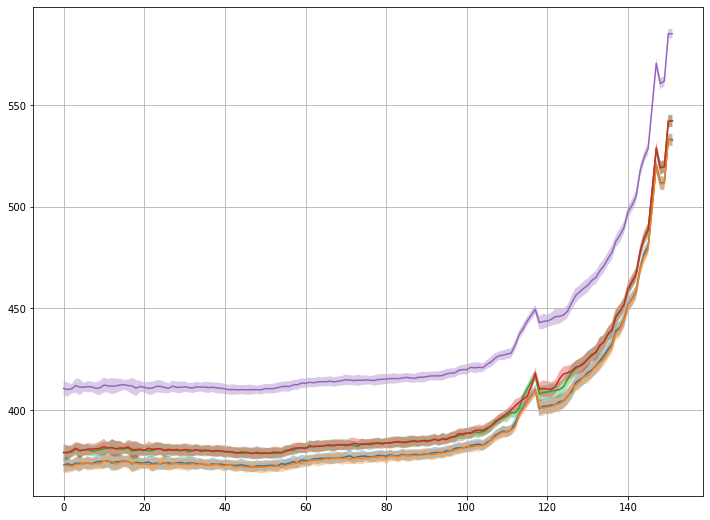

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Compute averages

cls_1 = train_test_data[train_test_data['y'] == 1]
cls_2 = train_test_data[train_test_data['y'] == 2]
cls_3 = train_test_data[train_test_data['y'] == 3]
cls_4 = train_test_data[train_test_data['y'] == 4]
cls_5 = train_test_data[train_test_data['y'] == 5]

cls_1_mean = cls_1.mean(0).to_numpy()[1:-1]
cls_2_mean = cls_2.mean(0).to_numpy()[1:-1]
cls_3_mean = cls_3.mean(0).to_numpy()[1:-1]
cls_4_mean = cls_4.mean(0).to_numpy()[1:-1]
cls_5_mean = cls_5.mean(0).to_numpy()[1:-1]

cls_1_std = cls_1.std(0).to_numpy()[1:-1]
cls_2_std = cls_2.std(0).to_numpy()[1:-1]
cls_3_std = cls_3.std(0).to_numpy()[1:-1]
cls_4_std = cls_4.std(0).to_numpy()[1:-1]
cls_5_std = cls_5.std(0).to_numpy()[1:-1]

cls_1_conf_bounds = [ np.add(cls_1_mean, cls_1_std),  np.subtract(cls_1_mean, cls_1_std) ]
cls_2_conf_bounds = [ np.add(cls_2_mean, cls_2_std),  np.subtract(cls_2_mean, cls_2_std) ]
cls_3_conf_bounds = [ np.add(cls_3_mean, cls_3_std),  np.subtract(cls_3_mean, cls_3_std) ]
cls_4_conf_bounds = [ np.add(cls_4_mean, cls_4_std),  np.subtract(cls_4_mean, cls_4_std) ]
cls_5_conf_bounds = [ np.add(cls_5_mean, cls_5_std),  np.subtract(cls_5_mean, cls_5_std) ]


x_range = [ *range(0, len(cls_1_mean) ) ]

fig_1, ax_1 = plt.subplots()
fig_1.set_size_inches(12,9)

ax_1.xaxis.grid()
ax_1.yaxis.grid()

# Plot class 1 data
ax_1.fill_between(x_range, cls_1_conf_bounds[0], cls_1_conf_bounds[1], alpha=0.35)
ax_1.plot(cls_1_mean)

# Plot class 2 data
ax_1.fill_between(x_range, cls_2_conf_bounds[0], cls_2_conf_bounds[1], alpha=0.35)
ax_1.plot(cls_2_mean)

# Plot class 3 data
ax_1.fill_between(x_range, cls_3_conf_bounds[0], cls_3_conf_bounds[1], alpha=0.35)
ax_1.plot(cls_3_mean)

# Plot class 4 data
ax_1.fill_between(x_range, cls_4_conf_bounds[0], cls_4_conf_bounds[1], alpha=0.35)
ax_1.plot(cls_4_mean)

# Plot class 5 data
ax_1.fill_between(x_range, cls_5_conf_bounds[0], cls_5_conf_bounds[1], alpha=0.35)
ax_1.plot(cls_5_mean)
